# Predicting future global temperature and greenhouse gas emission

Global warming, marked by a sustained increase in average temperatures, leads to lasting changes in weather patterns and ecosystems. This project aims to predict the future interplay between greenhouse gas (GHG) emissions and global temperature changes. CO2, CH4, and N2O, identified by the European Commission as the most impactful gases on global warming (European Commission, 2018), are the focus of this study. By examining the relationships between these emissions and temperature fluctuations, the study seeks to provide predictive insights for formulating effective environmental policies.

Climate change, defined by long-term shifts in weather patterns, is significantly affecting life on Earth. Substantial evidence, such as the rise in ocean temperatures and the increased frequency of extreme weather events, underscores the reality of climate change. Addressing global warming is a critical challenge that demands accurate predictions of GHG emissions and temperature impacts, essential for developing strategies to mitigate its effects on a global scale.

## Problem Statements

**1-Quantify the Relationship:** Analyze the correlation between CO2, N2O, and CH4 emissions with global temperature variations to understand the relative impact of each GHG on climate change.

**2-Trend Analysis:** Identify and model trends in both GHG emissions and global temperature changes over the decades to forecast future climate conditions.

**3-Predictive Modeling:** Develop predictive models to forecast future global temperature changes based on current and hypothetical future GHG emission trends.


### 1.Data Wrangling
### 1.1.Data Collection

For this project I identified three ,main data sources NOAA(https://gml.noaa.gov/ccgg/trends/global.html), the Berkeley Earth (https://berkeleyearth.org/data/), and Met office climate dashboard (https://climate.metoffice.cloud/greenhouse_gases.html#datasets). The datasets provided are all publicly available.

**Temperature dataset**
Berkely is provided as set of csv file,contains a detailed summary of the land-surface average results produced by the Berkeley Averaging method.  Temperatures are in Celsius and reported as anomalies relative to the Jan 1951-Dec 1980 average.  Uncertainties represent the 95% confidence interval for statistical and spatial undersampling effects.


**GHG datasets**

The Global Monitoring Laboratory has measured carbon dioxide and other greenhouse gases for several decades at a globally distributed network of air sampling sites [Conway, 1994].The dataset includes global monthly average of GHG.

Monthly nitrous oxide(N2O) concentration in the atmosphere as calculated by WDCGG . WMO Greenhouse Gas Bulletin, No.19, 2023. 15 November 2023 ISSN 2078-0796(https://library.wmo.int/records/item/68532-no-19-15-november-2023) 

* N2O expressed as a mole fraction in dry air, nanomol/mol, abbreviated as ppb-(1984-2022)
* CO2 expressed as a mole fraction in dry air, micromol/mol, abbreviated as ppm-(1979-2024)
* CH4 expressed as a mole fraction in dry air, nanomol/mol, abbreviated as ppb-(1983-2024)
* Temperature expressed as(°C)-(1880-2023)


Lan, X., Tans, P. and K.W. Thoning: Trends in globally-averaged CO2 determined from NOAA Global Monitoring Laboratory measurements. Version 2024-08 https://doi.org/10.15138/9N0H-ZH07

### 1.2. Import libreries

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 1.3.Data Loading

The GHG CSV files are contains a lot of commented lines at the beginning, which are not part of the actual data. These comments are causing the ParserError because the CSV parser is expecting data and instead is encountering lines that don't match the expected format. To fix this issue, I want to skip these commented lines when reading the CSV file.

In [41]:
# load global temperature data
temp= pd.read_csv("https://raw.githubusercontent.com/Mary080102/Capstone-3/main/Raw%20data/Complete_TAVG_complete.txt",
                 sep="\s+", comment='#', skiprows=33,header=None)
temp


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,%,"Year,","Month,","Anomaly,","Unc.,","Anomaly,","Unc.,","Anomaly,","Unc.,","Anomaly,","Unc.,","Anomaly,",Unc.
1,1750,1,-0.847,4.137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1750,2,-1.326,3.059,-1.062,1.074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1750,3,-0.050,2.279,-1.096,1.091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1750,4,-0.397,2.110,-1.138,1.090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,2024,2,1.990,0.103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3291,2024,3,2.009,0.149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3292,2024,4,1.923,0.111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3293,2024,5,1.474,0.070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# # Adjust the column names to match the exact number of columns, removing the '%' symbol
temp.columns = ['Year', 'Month', 'Anomaly', 'Unc_1', 'Anomaly_1', 'Unc_2', 'Anomaly_2', 
                'Unc_3', 'Anomaly_3', 'Unc_4', 'Anomaly_4', 'Extra_Column1', 'Extra_Column2']
temp

,Year,Month,Anomaly,Unc_1,Anomaly_1,Unc_2,Anomaly_2,Unc_3,Anomaly_3,Unc_4,Anomaly_4,Extra_Column1,Extra_Column2
0,%,"Year,","Month,","Anomaly,","Unc.,","Anomaly,","Unc.,","Anomaly,","Unc.,","Anomaly,","Unc.,","Anomaly,",Unc.
1,1750,1,-0.847,4.137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1750,2,-1.326,3.059,-1.062,1.074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1750,3,-0.050,2.279,-1.096,1.091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1750,4,-0.397,2.110,-1.138,1.090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,2024,2,1.990,0.103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3291,2024,3,2.009,0.149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3292,2024,4,1.923,0.111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3293,2024,5,1.474,0.070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Load the CO2 CSV file, skipping the commented lines
co2= pd.read_csv("https://raw.githubusercontent.com/Mary080102/Capstone-3/main/Raw%20data/co2_mm_gl.csv",
                 comment='#',skiprows=38)

In [5]:
co2

,year,month,decimal,average,average_unc,trend,trend_unc
0,1979,1,1979.042,336.56,0.11,335.92,0.09
1,1979,2,1979.125,337.29,0.09,336.25,0.10
2,1979,3,1979.208,337.88,0.11,336.51,0.10
3,1979,4,1979.292,338.32,0.12,336.72,0.10
4,1979,5,1979.375,338.26,0.03,336.71,0.10
...,...,...,...,...,...,...,...
540,2024,1,2024.042,422.26,0.10,421.16,0.06
541,2024,2,2024.125,422.71,0.10,421.31,0.06
542,2024,3,2024.208,423.24,0.10,421.59,0.06
543,2024,4,2024.292,423.65,0.10,421.80,0.06


In [6]:
# Load the CH4 CSV file, skipping the commented lines
ch4= pd.read_csv("https://raw.githubusercontent.com/Mary080102/Capstone-3/main/Raw%20data/ch4_mm_gl.csv",
                comment='#',skiprows=45)

In [7]:
ch4

,year,month,decimal,average,average_unc,trend,trend_unc
0,1983,7,1983.542,1626.09,2.26,1635.14,1.45
1,1983,8,1983.625,1628.01,2.88,1635.67,1.39
2,1983,9,1983.708,1638.42,2.34,1636.25,1.32
3,1983,10,1983.792,1644.81,1.50,1636.89,1.24
4,1983,11,1983.875,1642.59,0.73,1637.60,1.16
...,...,...,...,...,...,...,...
485,2023,12,2023.958,1931.87,-9.99,1927.32,-9.99
486,2024,1,2024.042,1930.21,-9.99,1928.35,-9.99
487,2024,2,2024.125,1928.40,-9.99,1929.36,-9.99
488,2024,3,2024.208,1929.88,-9.99,1930.38,-9.99


In [8]:
#Load the N2O CSV file
n2o= pd.read_csv('https://raw.githubusercontent.com/Mary080102/Capstone-3/main/Raw%20data/n2o_WDCGG%20N2O.csv')

In [9]:
n2o

,Year,Month,WDCGG N2O (ppb),WDCGG N2O uncertainty
0,1984,1,303.8,NaN
1,1984,2,303.8,NaN
2,1984,3,303.7,NaN
3,1984,4,303.7,NaN
4,1984,5,303.7,NaN
...,...,...,...,...
463,2022,8,335.8,NaN
464,2022,9,335.9,NaN
465,2022,10,336.1,NaN
466,2022,11,336.3,NaN


### 1.4. Data cleaning

We need to drop first row to fix the column headers and then in this project we need only first four columns that show monthly average for anomaly and uncertainty. So, we delete the other columns.

In [43]:
# Drop the first row that contain an unnecessary header
temp=temp.drop(0)

# Reset the index to keep things clean

temp=temp.reset_index(drop=True)
temp

,Year,Month,Anomaly,Unc_1,Anomaly_1,Unc_2,Anomaly_2,Unc_3,Anomaly_3,Unc_4,Anomaly_4,Extra_Column1,Extra_Column2
0,1750,1,-0.847,4.137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1750,2,-1.326,3.059,-1.062,1.074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1750,3,-0.050,2.279,-1.096,1.091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1750,4,-0.397,2.110,-1.138,1.090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1750,5,-1.777,1.337,-1.459,1.098,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,2024,2,1.990,0.103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3290,2024,3,2.009,0.149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3291,2024,4,1.923,0.111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3292,2024,5,1.474,0.070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
temp_drop = temp.drop(columns=['Anomaly_1','Unc_2','Anomaly_2','Unc_3','Anomaly_3','Unc_4',
                          'Anomaly_4','Extra_Column1','Extra_Column2',],axis=1)
temp_drop

,Year,Month,Anomaly,Unc_1
0,1750,1,-0.847,4.137
1,1750,2,-1.326,3.059
2,1750,3,-0.050,2.279
3,1750,4,-0.397,2.110
4,1750,5,-1.777,1.337
...,...,...,...,...
3289,2024,2,1.990,0.103
3290,2024,3,2.009,0.149
3291,2024,4,1.923,0.111
3292,2024,5,1.474,0.070


In [45]:
temp_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     3294 non-null   object
 1   Month    3294 non-null   object
 2   Anomaly  3293 non-null   object
 3   Unc_1    3293 non-null   object
dtypes: object(4)
memory usage: 103.1+ KB


based on the results of .info(), data type must be changed to int and float.


In [46]:
# Convert 'Year' and 'Month' columns to integer

temp_drop[['Year','Month']]= temp_drop[['Year','Month']].astype(int)

temp_drop[['Anomaly','Unc_1']]=temp_drop[['Anomaly','Unc_1']].astype(float)

In [47]:
temp_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     3294 non-null   int64  
 1   Month    3294 non-null   int64  
 2   Anomaly  3293 non-null   float64
 3   Unc_1    3293 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 103.1 KB


In [48]:
temp_drop.describe()

,Year,Month,Anomaly,Unc_1
count,3294.000000,3294.000000,3293.000000,3293.000000
mean,1886.750455,6.494536,-0.287610,0.902114
std,79.253618,3.452572,1.001339,1.050381
min,1750.000000,1.000000,-6.171000,0.023000
25%,1818.000000,3.000000,-0.724000,0.173000
50%,1887.000000,6.000000,-0.199000,0.373000
75%,1955.000000,9.000000,0.245000,1.392000
max,2024.000000,12.000000,4.893000,6.905000


In [16]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         545 non-null    int64  
 1   month        545 non-null    int64  
 2   decimal      545 non-null    float64
 3   average      545 non-null    float64
 4   average_unc  545 non-null    float64
 5   trend        545 non-null    float64
 6   trend_unc    545 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 29.9 KB


In [17]:
co2.describe()

,year,month,decimal,average,average_unc,trend,trend_unc
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,2001.211009,6.467890,2001.708334,374.240991,0.099083,374.227028,0.060954
std,13.124176,3.458177,13.122685,24.594662,0.029709,24.540011,0.016002
min,1979.000000,1.000000,1979.042000,334.360000,0.030000,335.920000,0.030000
25%,1990.000000,3.000000,1990.375000,353.910000,0.080000,353.770000,0.050000
50%,2001.000000,6.000000,2001.708000,371.050000,0.100000,370.880000,0.060000
75%,2013.000000,9.000000,2013.042000,393.990000,0.110000,394.080000,0.070000
max,2024.000000,12.000000,2024.375000,423.650000,0.290000,421.820000,0.110000


In [18]:
ch4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         490 non-null    int64  
 1   month        490 non-null    int64  
 2   decimal      490 non-null    float64
 3   average      490 non-null    float64
 4   average_unc  490 non-null    float64
 5   trend        490 non-null    float64
 6   trend_unc    490 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 26.9 KB


In [19]:
ch4.describe()

,year,month,decimal,average,average_unc,trend,trend_unc
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,2003.416327,6.504082,2003.916667,1779.213429,0.730306,1779.200224,0.304449
std,11.806126,3.461885,11.799590,68.925598,1.924136,68.733649,1.835271
min,1983.000000,1.000000,1983.542000,1626.090000,-9.990000,1635.140000,-9.990000
25%,1993.000000,3.250000,1993.729000,1738.655000,0.890000,1737.200000,0.540000
50%,2003.000000,7.000000,2003.916500,1775.770000,1.020000,1774.685000,0.620000
75%,2014.000000,9.750000,2014.104250,1818.282500,1.180000,1817.617500,0.690000
max,2024.000000,12.000000,2024.292000,1931.910000,2.880000,1931.410000,1.450000


In [20]:
n2o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   468 non-null    int64  
 1   Month                  468 non-null    int64  
 2   WDCGG N2O (ppb)        468 non-null    float64
 3   WDCGG N2O uncertainty  0 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 14.8 KB


In [21]:
n2o.describe()

,Year,Month,WDCGG N2O (ppb),WDCGG N2O uncertainty
count,468.000000,468.000000,468.000000,0.0
mean,2003.000000,6.500000,318.371154,NaN
std,11.266672,3.455747,9.199888,NaN
min,1984.000000,1.000000,303.700000,NaN
25%,1993.000000,3.750000,310.200000,NaN
50%,2003.000000,6.500000,317.650000,NaN
75%,2013.000000,9.250000,326.000000,NaN
max,2022.000000,12.000000,336.500000,NaN


### 1.4.1.Check Missing Values and duplicates
#### 1.4.1.1. Temperature

In [49]:
# check for missing values

temp_drop.isnull().sum()

Year       0
Month      0
Anomaly    1
Unc_1      1
dtype: int64

Based on the above results there are one misiing value in Anomaly and one in Unc_1 column. We can drop that values.

In [50]:
# Drop rows with missing values

temp_drop= temp_drop.dropna()

# Verify that the missing values are droppedtemp_drop.isnull().sum()

In [51]:
# Check for duplicate rows

duplicates= temp_drop.duplicated()

# Display rows that are duplicates
print(temp_drop[duplicates])

Empty DataFrame
Columns: [Year, Month, Anomaly, Unc_1]
Index: []


Based on the result there are no duplicate in temperature dataset.

#### 1.4.1.2. CO2

In [25]:
# check for missing values
co2.isnull().sum()

year           0
month          0
decimal        0
average        0
average_unc    0
trend          0
trend_unc      0
dtype: int64

In [26]:
# Check for duplicate 

co2.duplicated().sum()

0

Based on the results, the CO2 dataset does not have missing values or duplicates.

#### 1.4.1.3. CH4

In [27]:
ch4.isnull().sum()

year           0
month          0
decimal        0
average        0
average_unc    0
trend          0
trend_unc      0
dtype: int64

In [28]:
ch4.duplicated().sum()

0

Based on the results, the CH4 dataset does not have missing values or duplicates.

#### 1.4.1.4. N2O

In [29]:
n2o.isnull().sum()

Year                       0
Month                      0
WDCGG N2O (ppb)            0
WDCGG N2O uncertainty    468
dtype: int64

In [30]:
n2o.duplicated().sum()

0

Based on the results, the N2O dataset have missing value in WDCGG N2O uncertainty  column. This column would not be necessary for our project, so we do not need change the Null values. There are no any duplicate values in the dataset.

### Drop unnecessay columns

In [31]:
# Drop unnecessary Columns in CO2 data set

co2= co2.drop(['decimal','average_unc','trend','trend_unc'], axis=1) 
co2.head()

,year,month,average
0,1979,1,336.56
1,1979,2,337.29
2,1979,3,337.88
3,1979,4,338.32
4,1979,5,338.26


In [32]:
# Drop unnecessary Columns in CH4 data set

ch4=ch4.drop(['decimal','average_unc','trend','trend_unc'], axis=1) 
ch4.head()

,year,month,average
0,1983,7,1626.09
1,1983,8,1628.01
2,1983,9,1638.42
3,1983,10,1644.81
4,1983,11,1642.59


In [33]:
# Drop unnecessary Columns in N2O data set

n2o= n2o.drop('WDCGG N2O uncertainty',axis=1)
n2o.head()

,Year,Month,WDCGG N2O (ppb)
0,1984,1,303.8
1,1984,2,303.8
2,1984,3,303.7
3,1984,4,303.7
4,1984,5,303.7


### Changing Column name

In [52]:
# change column name in temperature dataset
temp_drop= temp_drop.rename(columns={'Unc_1':'Uncertainty'})
temp_drop

,Year,Month,Anomaly,Uncertainty
0,1750,1,-0.847,4.137
1,1750,2,-1.326,3.059
2,1750,3,-0.050,2.279
3,1750,4,-0.397,2.110
4,1750,5,-1.777,1.337
...,...,...,...,...
3289,2024,2,1.990,0.103
3290,2024,3,2.009,0.149
3291,2024,4,1.923,0.111
3292,2024,5,1.474,0.070


In [35]:
# change column name in N2O dataset
n2o= n2o.rename(columns={'WDCGG N2O (ppb)':'N2O'})
n2o

,Year,Month,N2O
0,1984,1,303.8
1,1984,2,303.8
2,1984,3,303.7
3,1984,4,303.7
4,1984,5,303.7
...,...,...,...
463,2022,8,335.8
464,2022,9,335.9
465,2022,10,336.1
466,2022,11,336.3


In [38]:
# change column name in CO2 dataset
co2=co2.rename(columns={'average':'CO2','year':'Year','month':'Month'})
co2

,Year,Month,CO2
0,1979,1,336.56
1,1979,2,337.29
2,1979,3,337.88
3,1979,4,338.32
4,1979,5,338.26
...,...,...,...
540,2024,1,422.26
541,2024,2,422.71
542,2024,3,423.24
543,2024,4,423.65


In [39]:
# change column name in CH4 dataset
ch4=ch4.rename(columns={'average':'CH4','year':'Year','month':'Month'})
ch4

,Year,Month,CH4
0,1983,7,1626.09
1,1983,8,1628.01
2,1983,9,1638.42
3,1983,10,1644.81
4,1983,11,1642.59
...,...,...,...
485,2023,12,1931.87
486,2024,1,1930.21
487,2024,2,1928.40
488,2024,3,1929.88


### Merging datasets

The datasets are in different time periods. Before merging them we need to align them to a common period to ensure consistency in the analysis.In this project, the common period across all datasets would likely be from 1984 to 2022, as these years are covered by all the datasets. By using filter each dataset to only include data within this common period (1984-2022). This will allow us to merge the datasets without introducing gaps or inconsistencies.

In [61]:
# Define the common period
start_year=1984
end_year=2022

# Filter datasets to the common period
temp_filterd= temp_drop[(temp_drop['Year']>=start_year)&(temp_drop['Year']<= end_year)]

co2_filtered= co2[(co2['Year']>=start_year)&(co2['Year']<=end_year)]

ch4_filtered= ch4[(ch4['Year']>=start_year)&(ch4['Year']<= end_year)]

n2o_filtered= n2o[(n2o['Year']>=start_year)&(n2o['Year']<=end_year)]

In [66]:
# Merging datasets on 'Year' and 'Month' columns

df1= pd.merge(temp_filterd,co2_filtered, on=['Year','Month'], how='inner')

df2= pd.merge(df1,ch4_filtered, on=['Year','Month'], how='inner')

df3= pd.merge(df2,n2o_filtered, on=['Year','Month'], how='inner')

In [67]:
df3

,Year,Month,Anomaly,Uncertainty,CO2,CH4,N2O
0,1984,1,0.377,0.053,344.32,1638.79,303.8
1,1984,2,-0.113,0.051,344.82,1638.84,303.8
2,1984,3,0.357,0.111,344.96,1640.88,303.7
3,1984,4,0.085,0.174,345.19,1643.99,303.7
4,1984,5,0.679,0.117,345.33,1643.12,303.7
...,...,...,...,...,...,...,...
463,2022,8,1.328,0.089,414.41,1908.82,335.8
464,2022,9,1.204,0.102,414.63,1915.52,335.9
465,2022,10,1.576,0.098,416.14,1919.85,336.1
466,2022,11,0.712,0.117,417.77,1923.43,336.3


### Calculate Actual Temperature

The temperature dataset contains a detailed summary of the land-surface average results produced by the Berkeley Averaging method.Temperatures are in Celsius and reported as anomalies relative to the Jan 1951-Dec 1980 
average. Results are based on 40532 time series with 18975001 data points. 
To calculate the actual temperature from the anomaly, we need two pieces of information: the anomaly value and the reference temperature.
The reference temperature is the average temperature over a specific period, typically a 30-year period, often referred to as the baseline period. This period is used to establish a normal or average temperature for a specific location. The reference temperature can be obtained from historical temperature records or climate datasets. The Berkeley use the the **"Estimated Jan 1951–Dec 1980 monthly absolute temperature"** refers to the average temperatures for each month during the period from January 1951 to December 1980. These temperatures are estimated values representing the average absolute temperature (in degrees Celsius) for each month over this 30-year period.

**Anomaly** value represents the deviation of the actual temperature from the reference temperature. It can be either positive or negative, depending on whether the actual temperature is above or below the reference temperature. To calculate the actual temperature, you add the anomaly value to the reference temperature.
The picture below shows refrence temperature for the datase.

**<u>Actual temperature = Reference temperature + Anomaly value**</u>




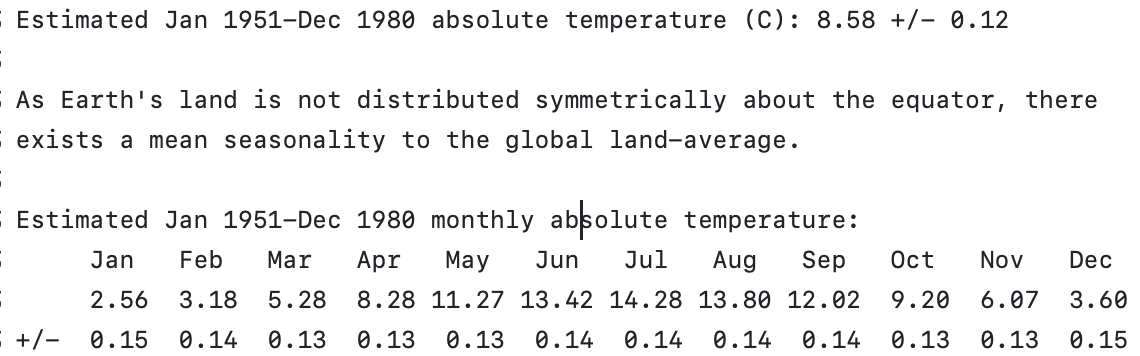


I can use this reference temperature to calculate the actual temperature for the dataset by adding the temperature anomaly to the reference temperature.


In [74]:
# Define the refrence monthly absolute temperatures (1951-1980)
monthly_refrence_temps = {
    1: 2.56,  # January
    2: 3.18,  # February
    3: 5.28,  # March
    4: 8.28,  # April
    5: 11.27, # May
    6: 13.42, # June
    7: 14.28, # July
    8: 13.80, # August
    9: 12.02, # September
    10: 9.20, # October
    11: 6.07, # November
    12: 3.60  # December
}

# Function to calculate the actual temperature based on the anomaly and month

def calculate_actual_temp(row):
    month = row['Month']
    anomaly = row['Anomaly']
    refrence_temp = monthly_refrence_temps[month]
    return refrence_temp + anomaly

# Apply the function to each row in the dataframe
df3['Actual_Temperature'] = df3.apply(calculate_actual_temp, axis=1)

In [115]:
df3

,Year,Month,Anomaly,Uncertainty,CO2,CH4,N2O,Actual_Temperature
0,1984,1,0.377,0.053,344.32,1638.79,303.8,2.937
1,1984,2,-0.113,0.051,344.82,1638.84,303.8,3.067
2,1984,3,0.357,0.111,344.96,1640.88,303.7,5.637
3,1984,4,0.085,0.174,345.19,1643.99,303.7,8.365
4,1984,5,0.679,0.117,345.33,1643.12,303.7,11.949
...,...,...,...,...,...,...,...,...
463,2022,8,1.328,0.089,414.41,1908.82,335.8,15.128
464,2022,9,1.204,0.102,414.63,1915.52,335.9,13.224
465,2022,10,1.576,0.098,416.14,1919.85,336.1,10.776
466,2022,11,0.712,0.117,417.77,1923.43,336.3,6.782


### 2. Exploratory Data Analysis

### 2.1.Exploring the Data

In [83]:
# make a copy of df3

df= df3.copy()

#Summary Statistics Table


df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,468.0,2003.000000,11.266672,1984.000,1993.0000,2003.000,2013.00000,2022.000
Month,468.0,6.500000,3.455747,1.000,3.7500,6.500,9.25000,12.000
Anomaly,468.0,0.821598,0.478111,-0.509,0.5025,0.836,1.16325,2.226
Uncertainty,468.0,0.081060,0.024351,0.029,0.0640,0.078,0.09625,0.176
CO2,468.0,376.972778,21.605372,342.130,357.4975,374.715,394.48000,418.800
CH4,468.0,1776.079274,63.082586,1638.010,1738.8650,1775.480,1813.46000,1924.690
N2O,468.0,318.371154,9.199888,303.700,310.2000,317.650,326.00000,336.500
Actual_Temperature,468.0,9.401598,4.124357,2.671,5.4210,9.619,13.37525,15.644


### 2.1.Data Distributions

In [84]:
#Create a Subset of the DataFrame to plot only desired columns

columns_to_plot=['CO2','CH4','N2O','Actual_Temperature']

df_subset= df[columns_to_plot]

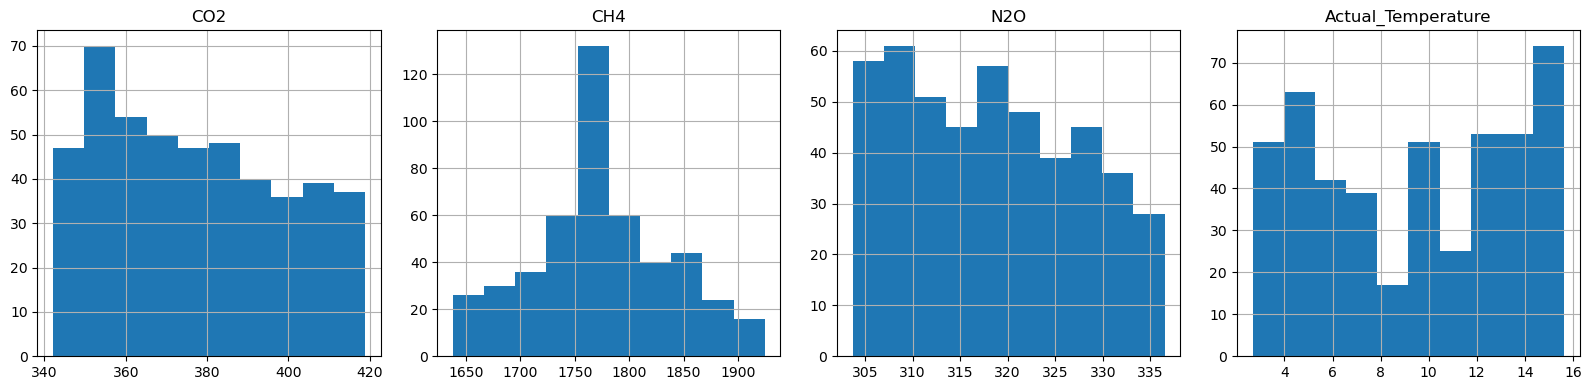

In [103]:
#Making histogram

df_subset.hist(layout=(1,4), bins=10, figsize=(16, 4))
plt.tight_layout()
plt.show()

Based on the above plots:

**CO2:**

The histogram for CO2 shows a distribution that is slightly skewed to the right. The majority of the data points are concentrated between 360 and 400, with a peak around 370. This suggests that most of the CO2 values fall within this range, with fewer values as we move to higher CO2 levels.

**CH4:**

The CH4 histogram appears to have a sharp peak around 1800, with most of the data clustered around this value. This indicates that the CH4 values are more concentrated in this specific range, with very few observations outside this central range, suggesting a somewhat normal distribution but with a significant peak.

**N2O:**

The distribution of N2O is more evenly spread, with no sharp peaks, indicating that the values are distributed over a wider range. The data is somewhat uniform but with slight variations, showing some concentrations between 310 and 320 and again around 330.

**Actual Temperature:**

The histogram for Actual Temperature shows a distribution that is skewed to the left, with a peak towards the higher end of the temperature range (around 15). There is a significant number of data points in this range, indicating that higher temperatures are more frequent in this dataset.

### 2.2.Visualization

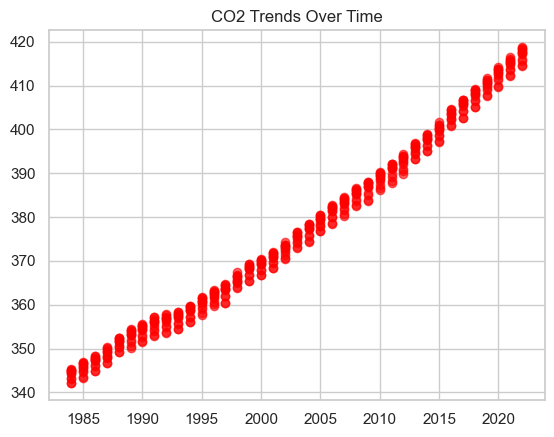

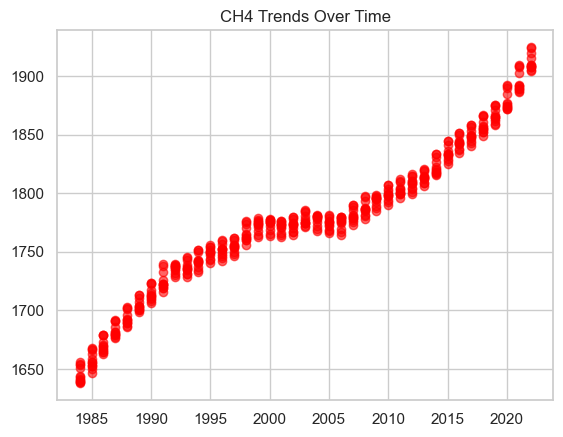

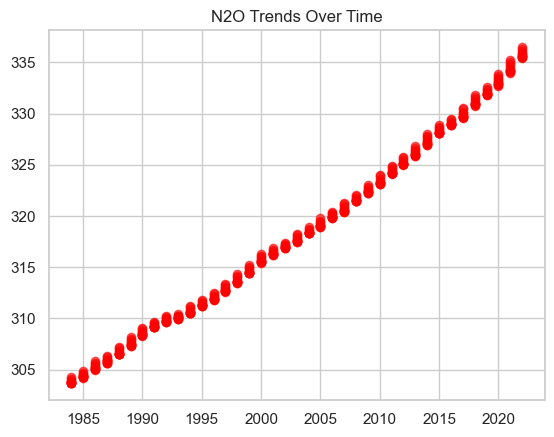

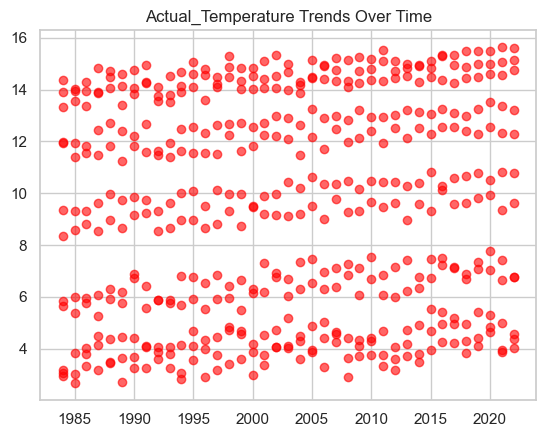

In [139]:
year=df['Year']
def plot_trend(year,data,color='red',label=None,title=None, alpha=0.6):
    """
    Plots the trend of a given data series over time.

    Parameters:
    year (pd.Series or np.array): Array or Series of years.
    data (pd.Series or np.array): Array or Series of data points corresponding to the years.
    label (str, optional): Label for the plot. Defaults to None.
    color (str, optional): Color for the plot. Defaults to 'red'.
    title (str): Title of the plot. Default is None.
    alpha (float, optional): Transparency level for the plot. Defaults to 0.6.
    """
    #plt.plot(year, data, color=color, label=label, alpha=alpha)
    plt.scatter(year, data, color=color, alpha=alpha)
    plt.title(title if title else f'{column} Trends Over Time')
    
    # Set grid
    plt.grid(True)

    plt.show()

# Plotting for all columns except 'Year'
for column in df_subset.columns:
    if column != 'Year':
        plot_trend(year, df[column], label=column, alpha=0.6)

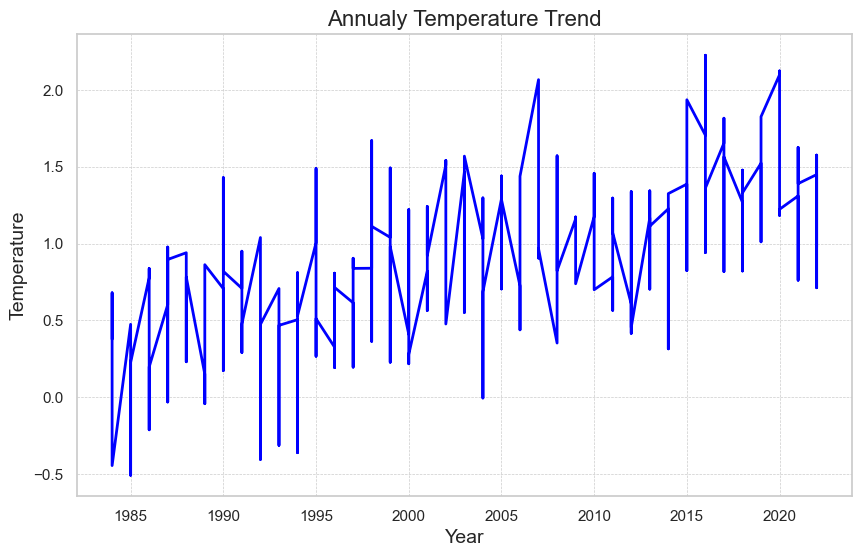

In [159]:
fig, ax = plt.subplots(figsize=(10, 6))




ax.plot(year, fitted_line, color='blue', linewidth=2, label='temp)')

# Setting title and labels
ax.set_title('Annualy Temperature Trend', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Temperature', fontsize=14)

# Grid settings
ax.grid(True, linestyle='--', linewidth=0.5)


# Show plot
plt.show()

### 2.3. Correlation Analysis

In this section we can call the .corr() method on our data to look at all the correlations between our variables.

In [160]:
# Call the .corr() method on the dataset 

df[['Year','N2O','CH4','CO2','Actual_Temperature']].corr()

,Year,N2O,CH4,CO2,Actual_Temperature
Year,1.000000,0.996667,0.969320,0.993498,0.085160
N2O,0.996667,1.000000,0.973355,0.997056,0.077939
CH4,0.969320,0.973355,1.000000,0.965819,0.039344
CO2,0.993498,0.997056,0.965819,1.000000,0.051759
Actual_Temperature,0.085160,0.077939,0.039344,0.051759,1.000000


/Users/marzieh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marzieh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marzieh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marzieh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

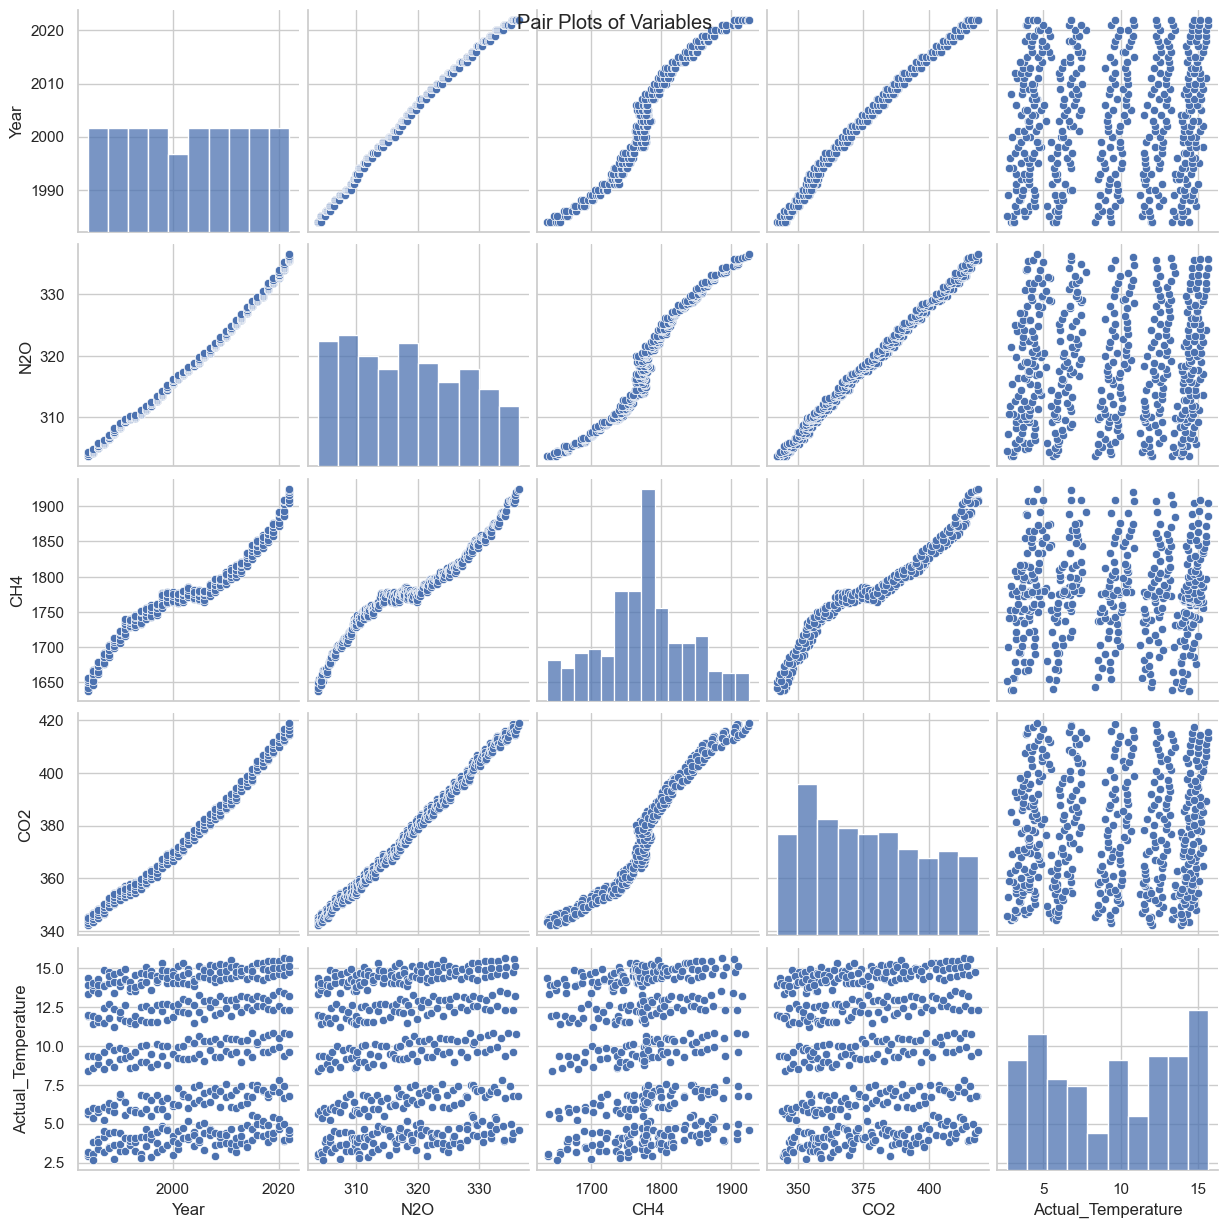

In [161]:
#Plotting the pairwise relationships in the dataset, to check out how our variables relate to one another

sns.pairplot(df[['Year','N2O','CH4','CO2','Actual_Temperature']])
plt.suptitle('Pair Plots of Variables')
plt.show()

### 2.3.1.Visualize Relationships Between Variables

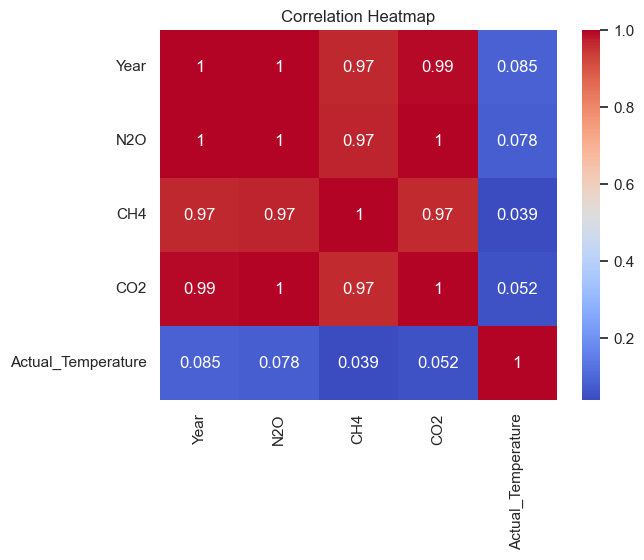

In [162]:
#correlation matrix 
#Create a correlation heatmap for looking at the correlation of all variables/features for dataset

sns.heatmap(df[['Year','N2O','CH4','CO2','Actual_Temperature']].corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Strong Positive Correlation Between CO2, CH4, and N2O:**

The gases CO2, CH4, and N2O all show a very strong positive correlation with each other, with values close to 1 (e.g., CO2 and CH4 have a correlation of 0.97). This suggests that as the concentration of one of these gases increases, the concentrations of the others also tend to increase in a similar manner over time.

**Correlation Between Gases and Time (Year):**

The variables for the gases (CO2, CH4, N2O) also have a very strong correlation with the year, which is expected given that greenhouse gas concentrations have generally increased over time.

**Weak Correlation Between Temperature and Greenhouse Gases:**

The "Actual Temperature" shows weak correlations with the greenhouse gases (e.g., CO2 and temperature have a correlation of 0.052). This suggests that while there might be a relationship, it is not as direct or strong as the relationship between the gases themselves.
The weak correlation might indicate the complexity of temperature change, which is influenced by many other factors besides just the concentrations of these gases.

**Very Low or No Correlation Between Year and Actual Temperature:**

There is a very low correlation between the year and actual temperature (0.085), which might indicate that the temperature data does not show a clear linear trend with time in this dataset.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))



# Fitted line or trendline (optional, assuming you have this data)
# You can calculate this using a rolling mean, a fitted model, or any method you prefer

ax.plot(year, fitted_line, color='blue', linewidth=2, label='temp)')

# Setting title and labels
ax.set_title('Annualy Temperature Trend', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Temperature', fontsize=14)

# Grid settings
ax.grid(True, linestyle='--', linewidth=0.5)


# Show plot
plt.show()